# Decision Trees

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Vehicle Set

In [2]:
vehicle_prices_path = Path('.', 'data', 'vehicles_train.csv')
vehicle_prices = pd.read_csv(vehicle_prices_path)

In [3]:
vehicle_prices.head

<bound method NDFrame.head of     price  year   miles  doors  vtype
0   22000  2012   13000      2    car
1   14000  2010   30000      2    car
2   13000  2010   73500      4    car
3    9500  2009   78000      4    car
4    9000  2007   47000      4    car
5    4000  2006  124000      2    car
6    3000  2004  177000      4    car
7    2000  2004  209000      4  truck
8    3000  2003  138000      2    car
9    1900  2003  160000      4    car
10   2500  2003  190000      2  truck
11   5000  2001   62000      4    car
12   1800  1999  163000      2  truck
13   1300  1997  138000      4    car>

year


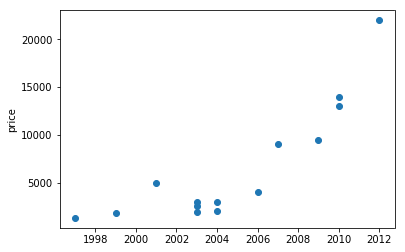

miles


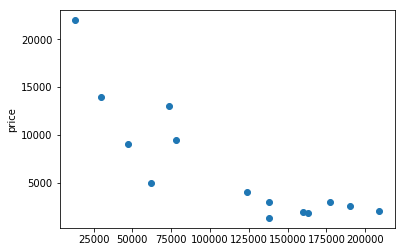

doors


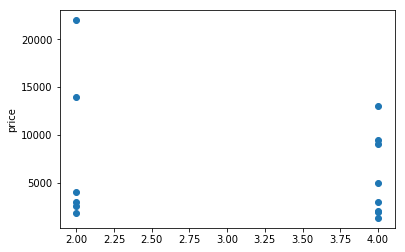

vtype


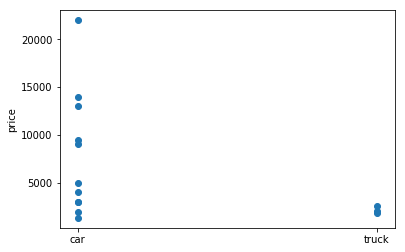

In [4]:
y = vehicle_prices.loc[:, 'price']

for var in ['year', 'miles', 'doors', 'vtype']:
    print(var)
    x = vehicle_prices.loc[:, var]
    plt.scatter(x, y)
    plt.ylabel('price')
    plt.show()

In [5]:
old = vehicle_prices.loc[:, 'year'] < 2006.5
new = vehicle_prices.loc[:, 'year'] > 2006.5

vehicle_prices_old = vehicle_prices.loc[old, :]
vehicle_prices_new = vehicle_prices.loc[new, :]

year


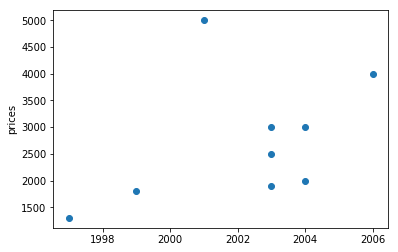

miles


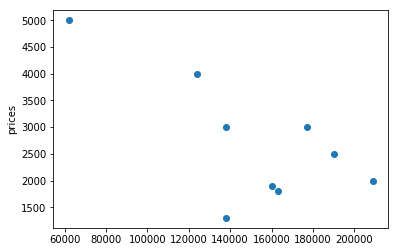

doors


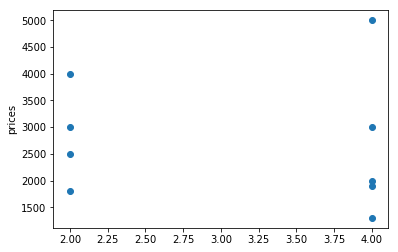

vtype


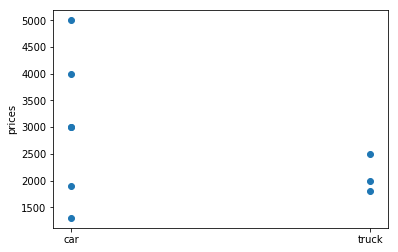

In [6]:
y = vehicle_prices_old.loc[:, 'price']
for var in ['year', 'miles', 'doors', 'vtype']:
    print(var)
    x = vehicle_prices_old.loc[:, var]
    plt.scatter(x, y)
    plt.ylabel('prices')
    plt.show()

year


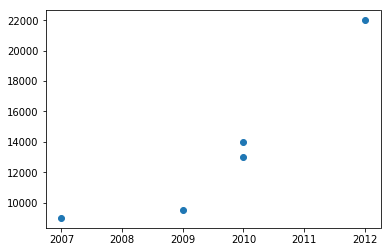

miles


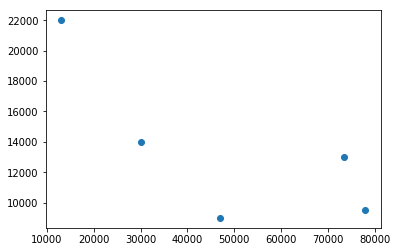

doors


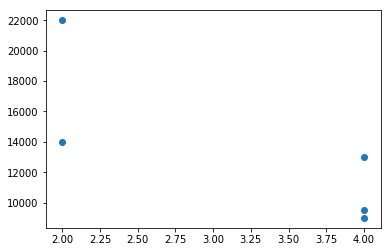

vtype


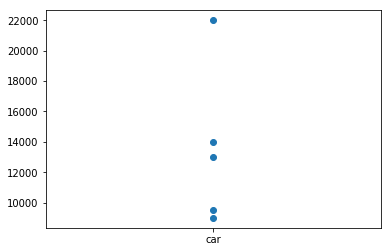

In [7]:
y = vehicle_prices_new.loc[:, 'price']
for var in ['year', 'miles', 'doors', 'vtype']:
    print(var)
    x = vehicle_prices_new.loc[:, var]
    plt.scatter(x, y)
    plt.show()

In [8]:
# Draw your tree, labeling the leaves with the mean price 
# for the observations in that region. 
# Make sure nothing is backwards: 
# You follow the left branch if the rule is true and the right branch if the rule is false.



is_car = vehicle_prices_old.loc[:, 'vtype'] == 'car'
has_4_doors = vehicle_prices_new.loc[:, 'doors'] == 4

print('leaves is mean price')
print('old cars : ', vehicle_prices_old.loc[is_car, 'price'].mean())
print('old trucks: ' , vehicle_prices_old.loc[-is_car, 'price'].mean())

print('new 4-door vehicles: ' , vehicle_prices_new.loc[has_4_doors, 'price'].mean())
print('new 2-door vehicles: ' , vehicle_prices_new.loc[-has_4_doors, 'price'].mean())

leaves is mean price
old cars :  3033.3333333333335
old trucks:  2100.0
new 4-door vehicles:  10500.0
new 2-door vehicles:  18000.0


# Training Data Set

In [9]:
path = Path('.', 'data', 'vehicles_train.csv')
train = pd.read_csv(path)

In [10]:
train.loc[:, 'prediction'] = train.loc[:, 'price'].mean()
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [11]:
from sklearn import metrics
import numpy as np

print('RMSE of price to prediction of mean price:' , np.sqrt(metrics.mean_squared_error(train.loc[:, 'price'], train.loc[:, 'prediction'])))

RMSE of price to prediction of mean price: 5936.981986


In [12]:
# Define a function that calcs the RMSE for a given split of miles

def mileage_split(mileage_cutoff):
    low_miles = train.loc[:, 'miles'] < mileage_cutoff
    high_miles = train.loc[:, 'miles'] >= mileage_cutoff
    lower_mileage_prices = train.loc[low_miles, 'price']
    higher_mileage_prices = train.loc[high_miles, 'price']
    
    lower_mileage_prediction = lower_mileage_prices.mean()
    higher_mileage_prediction = higher_mileage_prices.mean()
    
    train.loc[:, 'prediction'] = (
        np.where(train.loc[:, 'miles'] < mileage_cutoff,
                lower_mileage_prediction,
                higher_mileage_prediction
                )
    )
    
    return np.sqrt(
        metrics.mean_squared_error(train.loc[:, 'price'], 
                                   train.loc[:, 'prediction'])
    )

In [13]:
mileage_split(50000)


3984.0917425414564

In [14]:
mileage_cutoff_values = range(train.loc[:, 'miles'].min(), 
                               train.loc[:, 'miles'].max(), 
                               1000)

RMSE = [mileage_split(cutoff_value) for cutoff_value in mileage_cutoff_values]

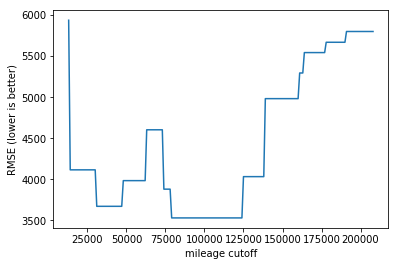

In [15]:
plt.plot(mileage_cutoff_values, RMSE)
plt.xlabel('mileage cutoff')
plt.ylabel('RMSE (lower is better)');

In [16]:
train.loc[:, 'is_truck'] = train.loc[:, 'vtype'].map({'car': 0,
                                                      'truck': 1})

train

,price,year,miles,doors,vtype,prediction,is_truck
0,22000,2012,13000,2,car,6923.076923,0
1,14000,2010,30000,2,car,6923.076923,0
2,13000,2010,73500,4,car,6923.076923,0
3,9500,2009,78000,4,car,6923.076923,0
4,9000,2007,47000,4,car,6923.076923,0
5,4000,2006,124000,2,car,6923.076923,0
6,3000,2004,177000,4,car,6923.076923,0
7,2000,2004,209000,4,truck,2000.000000,1
8,3000,2003,138000,2,car,6923.076923,0
9,1900,2003,160000,4,car,6923.076923,0


In [17]:
feature_cols = ['year', 'miles', 'doors', 'is_truck']

X = train.loc[:, feature_cols]
y = train.loc[:, 'price']

from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [18]:
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
rmse = np.sqrt(scores)
np.mean(rmse)


3107.1428571428573

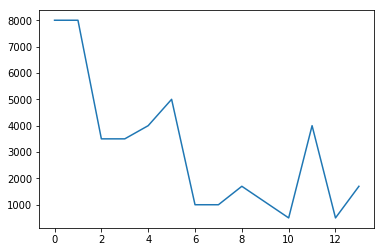

In [19]:
plt.plot(rmse)

In [20]:
y

0     22000
1     14000
2     13000
3      9500
4      9000
5      4000
6      3000
7      2000
8      3000
9      1900
10     2500
11     5000
12     1800
13     1300
Name: price, dtype: int64

In [21]:
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
scores = -cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
rmse=np.sqrt(scores)
np.mean(rmse)

3107.1428571428573

In [22]:
max_depth_range = range(1,8)

rmse_scores=[]

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores_for_this_depth = (-cross_val_score(treereg, X, y, scoring='neg_mean_squared_error'))
    rmse_scores_for_this_depth = np.sqrt(mse_scores_for_this_depth)
    mean_rmse_for_this_depth = np.mean(rmse_scores_for_this_depth)
    rmse_scores.append(mean_rmse_for_this_depth)


Text(0,0.5,'RMSE (lower is better)')

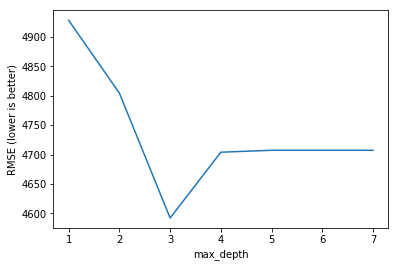

In [23]:
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [24]:
# max_depth=3 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [25]:
feature_cols

['year', 'miles', 'doors', 'is_truck']

In [26]:
treereg.feature_importances_

array([ 0.79874419,  0.20125581,  0.        ,  0.        ])

In [27]:
pd.DataFrame({'feature': feature_cols,
             'importance': treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,is_truck,0.000000


In [28]:
# Create a Decision Tree using Graphviz file.
from sklearn.tree import export_graphviz

export_graphviz(treereg, out_file='./assets/tree_vehicles.dot', feature_names=feature_cols)

![blah blah](./assets/tree_vehicles.png)

In [29]:
path = Path('.', 'data', 'vehicles_test.csv')
test = pd.read_csv(path)

In [30]:
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,truck
1,6000,2005,82500,4,car
2,12000,2010,60000,2,car


In [31]:
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,truck
1,6000,2005,82500,4,car
2,12000,2010,60000,2,car


In [32]:

test.loc[:, 'is_truck'] = test.loc[:, 'vtype'].map({'car':0, 'truck':1})

X_test = test.loc[:, feature_cols]
treereg.predict(X_test)

array([  4000.,   5000.,  13500.])

In [33]:
feature_cols

['year', 'miles', 'doors', 'is_truck']

In [34]:
X_test = test.loc[:, feature_cols]
y_test = test.loc[:, 'price']
y_pred = treereg.predict(X_test)

y_pred

array([  4000.,   5000.,  13500.])

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

# Hitters Data

In [36]:
path = Path('.', 'data', 'hitters.csv')
hitters = pd.read_csv(path)

In [37]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [38]:
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [39]:
hitters = hitters.dropna()

In [40]:
X = hitters.loc[:, ['Years', 'Hits']]
y = hitters.loc[:, 'Salary']

In [41]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
y_pred = dtr.predict(X)

metrics.mean_squared_error(y, y_pred)

273.81416349809888

In [42]:
dtr.feature_importances_

array([ 0.40851381,  0.59148619])

In [43]:
pd.DataFrame({'feature': ['Years', 'Hits'],
              'importance ': dtr.feature_importances_})

,feature,importance
0,Years,0.408514
1,Hits,0.591486


In [45]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True)
np.mean(-cross_val_score(dtr, X, y, cv=kf, scoring='neg_mean_squared_error'))

208006.26039667142